In [1]:
%load_ext autoreload
%autoreload 2


import backports.lzma as lzma
import compression as C
import mahotas as mh
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import imshow

%matplotlib inline

ac3 = C.Util.load_data('ac3', -1, '/Volumes/FFRITZ/cs222/ac3/rhoana/')

# maybe this can be tuned
LZMA_filters = [{"id": lzma.FILTER_LZMA1, "preset": lzma.PRESET_EXTREME}]

/Users/Fritz/Virtualenvs/cs222/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [38]:
def get_3d_labeled_border(img_stack, mask=None):
    if mask is None:
        mask = np.array([[0,1,0], [1,1,1], [0,1,0]])
    
    borders = np.zeros(img_stack.shape, dtype=np.bool)
    
    for z in np.arange(img_stack.shape[0]):
        borders[z] = mh.labeled.borders(img_stack[z], Bc=mask)
    
    return borders

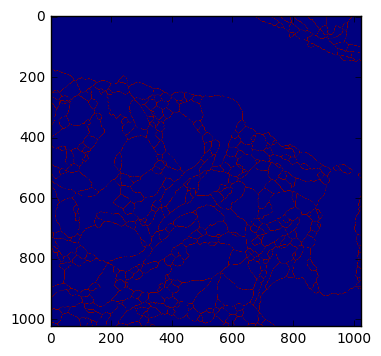

In [9]:
# Original vs RLE masked borders

mh_borders_org = mh.labeled.borders(ac3[0])
imshow(mh_borders_org)

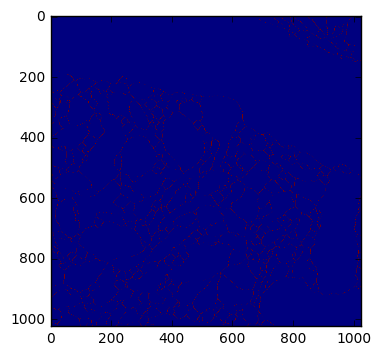

In [41]:
# RLE masked borders

mask_rle = np.array([[0, 0, 0], [0, 0, 1], [0, 0, 0]])
mh_borders_rle = mh.labeled.borders(ac3[0], Bc=mask_rle)
imshow(mh_borders_rle)

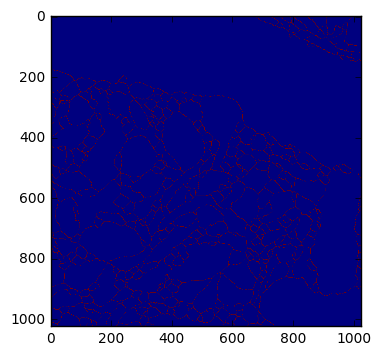

In [97]:
# RLE masked borders

mask_wurst = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0]])
mh_borders_wurst = mh.labeled.borders(ac3[0], Bc=mask_wurst)
imshow(mh_borders_wurst)

In [43]:
# Sanity check 3D borders
assert np.array_equal(mh_borders_org, get_3d_labeled_border(ac3[0:2])[0])
assert np.array_equal(mh_borders_rle, get_3d_labeled_border(ac3[0:2], mask=mask_rle)[0])

In [54]:
# Sanity check

# 2D
assert np.array_equal(mh_borders_org, C.B2N.decode(C.B2N.encode(mh_borders_org)))
assert np.array_equal(mh_borders_rle, C.B2N.decode(C.B2N.encode(mh_borders_rle)))

# 3D
assert np.array_equal(get_3d_labeled_border(ac3[0:2]), C.B2N.decode(C.B2N.encode(get_3d_labeled_border(ac3[0:2]))))
assert np.array_equal(get_3d_labeled_border(ac3[0:2], mask=mask_rle), C.B2N.decode(C.B2N.encode(get_3d_labeled_border(ac3[0:2], mask=mask_rle))))

In [205]:
# Test compressibility 2D different masks
print 'Org:', C.Util.get_size(C.LZMA.compress(C.B2N.encode(mh_borders_org)))
print 'RLE:', C.Util.get_size(C.LZMA.compress(C.B2N.encode(mh_borders_rle)))
print 'Wurst:', C.Util.get_size(C.LZMA.compress(C.B2N.encode(mh_borders_wurst)))
print 'RLE with RLEV2:', C.Util.get_size(C.LZMA.compress(C.RLEV2.encode(mh_borders_rle)))

Org: 15512
RLE: 12720
Wurst: 14468
RLE with RLEV2:

IndexError: tuple index out of range

In [206]:
C.Util.get_size(C.LZMA.compress(C.RLEV2.encode(get_3d_labeled_border(stack, mask=mask_rle))))

1005500

In [60]:
# Test compressibility 3D different windows

stack = ac3

print '--- 64bit ---'
print '16x4 ', C.Util.get_size(C.LZMA.compress(C.B2N.encode(get_3d_labeled_border(stack, mask=mask_rle), window=[16,4])))
print ' 4x16', C.Util.get_size(C.LZMA.compress(C.B2N.encode(get_3d_labeled_border(stack, mask=mask_rle), window=[4,16])))
print ' 8x8 ', C.Util.get_size(C.LZMA.compress(C.B2N.encode(get_3d_labeled_border(stack, mask=mask_rle), window=[8,8])))
print '--- 32bit ---'
print ' 8x4 ', C.Util.get_size(C.LZMA.compress(C.B2N.encode(get_3d_labeled_border(stack, mask=mask_rle), window=[8,4])))
print ' 4x8 ', C.Util.get_size(C.LZMA.compress(C.B2N.encode(get_3d_labeled_border(stack, mask=mask_rle), window=[4,8])))
print '--- 16bit ---'
print ' 8x2 ', C.Util.get_size(C.LZMA.compress(C.B2N.encode(get_3d_labeled_border(stack, mask=mask_rle), window=[8,2])))
print ' 2x8 ', C.Util.get_size(C.LZMA.compress(C.B2N.encode(get_3d_labeled_border(stack, mask=mask_rle), window=[2,8])))
print ' 4x4 ', C.Util.get_size(C.LZMA.compress(C.B2N.encode(get_3d_labeled_border(stack, mask=mask_rle), window=[4,4])))
print '---  8bit ---'
print ' 4x2 ', C.Util.get_size(C.LZMA.compress(C.B2N.encode(get_3d_labeled_border(stack, mask=mask_rle), window=[4,2])))
print ' 2x4 ', C.Util.get_size(C.LZMA.compress(C.B2N.encode(get_3d_labeled_border(stack, mask=mask_rle), window=[2,4])))
print '============='

--- 64bit ---
16x4  752972
 4x16 942920
 8x8  786724
--- 32bit ---
 8x4  771228
 4x8  894004
--- 16bit ---
 8x2  764692
 2x8  1080996
 4x4  879260
---  8bit ---
 4x2  856104
 2x4  1066916


[[ True  True  True False False False False False]
 [ True  True  True False False False False False]
 [ True  True  True False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False  True  True]
 [False False False False False False  True  True]]
[[1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 2 2]]
2


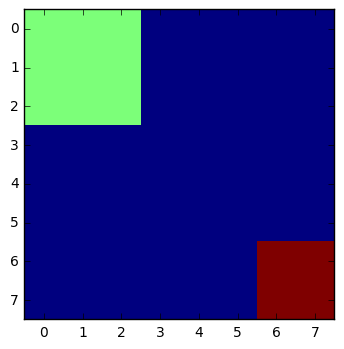

In [65]:
regions = np.zeros((8,8), bool)

regions[:3,:3] = 1
regions[6:,6:] = 1
labeled, nr_objects = mh.label(regions)

print regions
print labeled
print nr_objects

imshow(labeled, interpolation='nearest')

In [117]:
# Test ID encodings
import scipy
from skimage import measure

total_size_ids = np.zeros(ac3.shape[0])
total_size_bools = np.zeros(ac3.shape[0])

start_loc_ids_3d = np.zeros(ac3.shape, dtype=np.uint16)
start_loc_bool_3d = np.zeros(ac3.shape, dtype=np.bool)

for z in np.arange(ac3.shape[0]):
    start_loc_ids = np.zeros(ac3[z].shape, dtype=np.uint16)
    start_loc_bool = np.zeros(ac3[z].shape, dtype=np.bool)

    L = measure.label(ac3[z])

    for region in measure.regionprops(L):

        #print region.coords[0, 0], region.coords[0, 1]
        start_loc_ids[region.coords[0, 0], region.coords[0, 1]] = ac3[z][region.coords[0, 0], region.coords[0, 1]]
        start_loc_ids_3d[z] = start_loc_ids
        
        start_loc_bool[region.coords[0, 0], region.coords[0, 1]] = True
        start_loc_bool_3d[z] = start_loc_bool

    total_size_ids[z] = C.Util.get_size(C.LZMA.compress(start_loc_ids))
    total_size_bools[z] = C.Util.get_size(C.LZMA.compress(start_loc_bool))

200136.0 2668.48
132716.0 1769.54666667
Ids 3D: 172464
Bools 3D: 118256


In [201]:
# Sanity Check
assert np.array_equal(start_loc_bool_3d, C.RLEV2.decode(C.RLEV2.encode(start_loc_bool_3d)))

In [202]:
C.Util.get_size(C.LZMA.compress(C.RLEV2.encode(start_loc_bool_3d)))

46112

In [203]:
# Outputs from above

print 'Ids 2D Total', np.sum(total_size_ids), 'Ids 2D Mean', np.mean(total_size_ids)
print 'Bools 2D Total', np.sum(total_size_bools), 'Bools 2D Mean', np.mean(total_size_bools)

print 'Ids 3D:', C.Util.get_size(C.LZMA.compress(start_loc_ids_3d))
print 'Ids 3D RLE:', C.Util.get_size(C.LZMA.compress(C.RLE3D.encode(start_loc_ids_3d)))
print 'Bools 3D:', C.Util.get_size(C.LZMA.compress(start_loc_bool_3d))
print 'Bools 3D RLE:', C.Util.get_size(C.LZMA.compress(C.RLEV2.encode(start_loc_bool_3d)))
print 'Bools 3D B2N:', C.Util.get_size(C.LZMA.compress(C.B2N.encode(start_loc_bool_3d)))

Ids 2D Total 200136.0 Ids 2D Mean 2668.48
Bools 2D Total 132716.0 Bools 2D Mean 1769.54666667
Ids 3D: 172464
Ids 3D RLE: 101380
Bools 3D: 118256
Bools 3D RLE: 46112
Bools 3D B2N: 89568


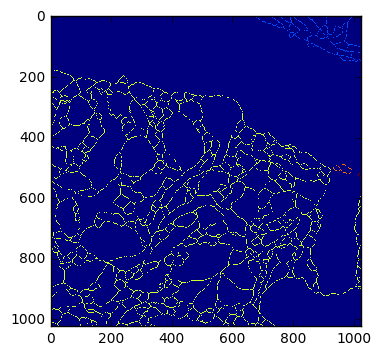

In [76]:
L = measure.label(mh_borders_org)
imshow(L, interpolation='nearest')

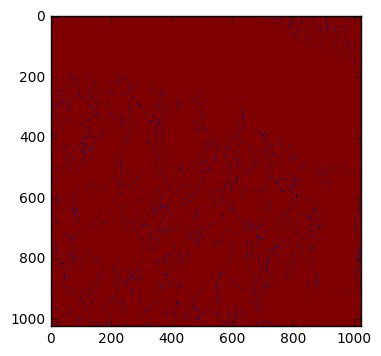

In [89]:
w = np.invert(mh_borders_rle)
ww = measure.label(w)
imshow(ww, interpolation='nearest')